# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [213]:
# load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_loan = pd.read_csv("../DATA/lending_club_loan_two.csv")

In [95]:
df_loan.shape

(396030, 27)

In [96]:
#Setting max columns settings
pd.set_option('display.max_columns', None)

In [4]:
df_loan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [5]:
#checking null values

df_loan.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

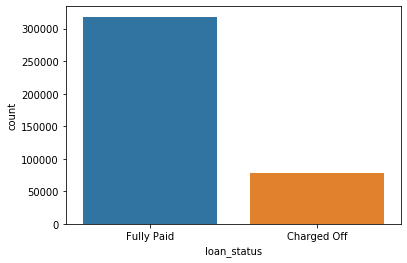

In [11]:
# checking loan_status field to see if this data is favorable or unfavorable 

sns.countplot(x="loan_status",data=df_loan)

In [15]:
# 80% of this data predicts that loan was fully paid so whatever model we create it will ensure atleast 80% accuracy
# this data is unfavourable

len(df_loan[df_loan["loan_status"] == "Fully Paid"])/len(df_loan["loan_status"])

0.8038709188697826

In [78]:
df_loan.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"


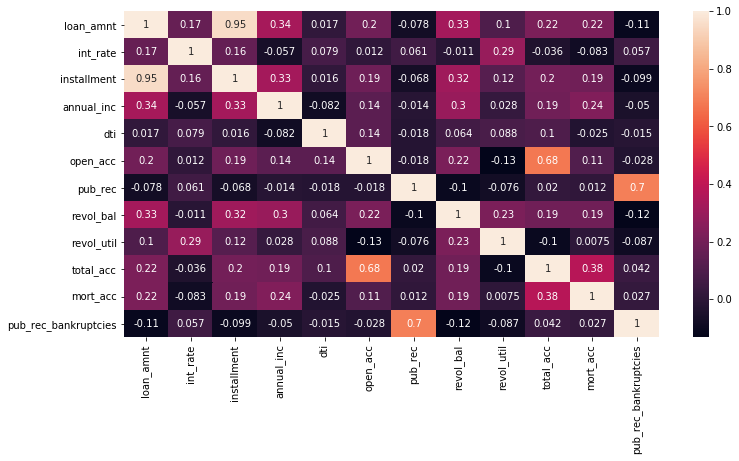

In [105]:
#exploring heatmap

plt.figure(figsize=(12,6))
sns.heatmap(df_loan.corr(),annot=True)

In [106]:
#exploring correlation 
df_loan.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


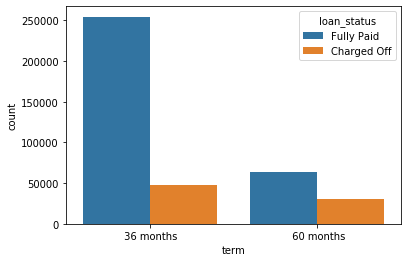

In [18]:
# term categorical column should be hot encoded as it impacts loan status column
sns.countplot(x="term",hue="loan_status",data=df_loan)

In [19]:
# unique values of employee title is too many and provided by employee/borrower themselves so no longer needed this
df_loan["emp_title"].nunique()

173105

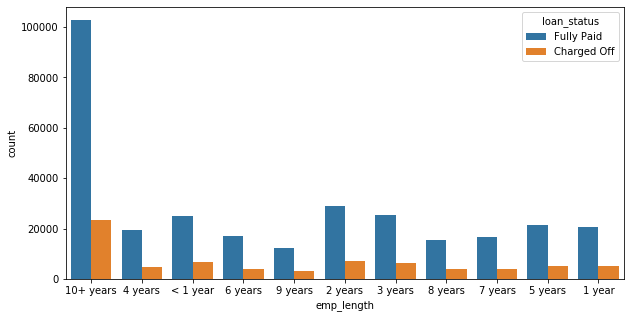

In [32]:
# exploring employement length with loan_status column

plt.figure(figsize=(10,5))

sns.countplot(df_loan["emp_length"],hue="loan_status",data=df_loan)

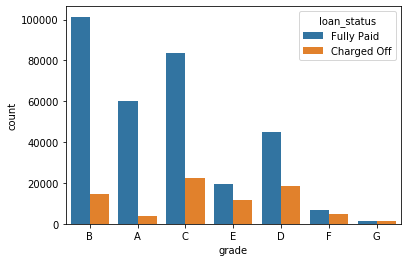

In [34]:
# exploring grade and subgrade columns

sns.countplot(x="grade",hue="loan_status",data=df_loan)

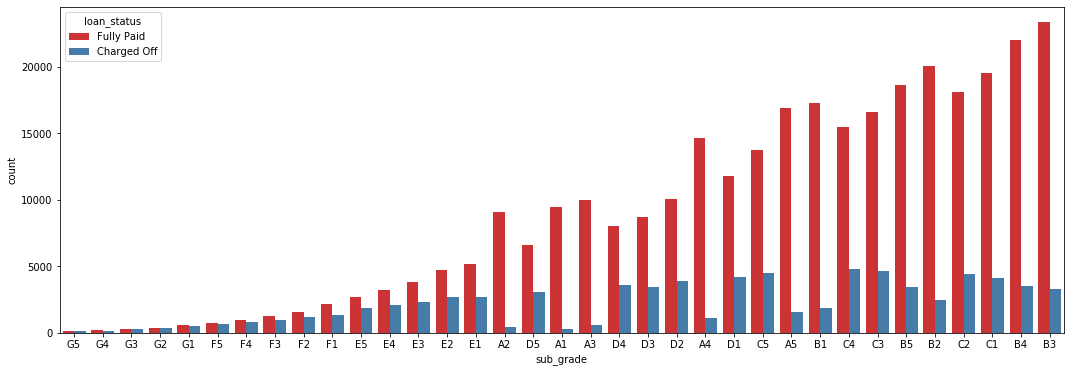

In [75]:
# exploring grade and subgrade columns
# we can see below the subgrade G and F does not impact our label much
plt.figure(figsize=(18,6))
sorted=df_loan["sub_grade"].value_counts(ascending=True).index
sns.countplot(x="sub_grade",hue="loan_status",data=df_loan,order=sorted,palette = "Set1")

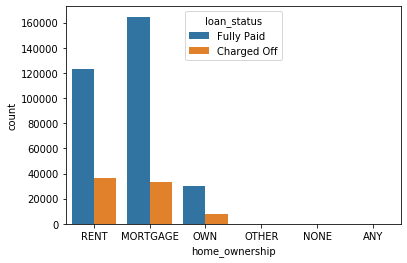

In [76]:
#exploring home_ownership, it need one hot encoding and , Other,none and any can either go away or be combined

sns.countplot(x="home_ownership",hue="loan_status",data=df_loan)

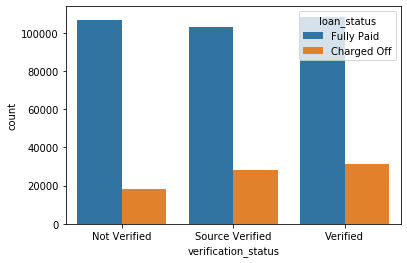

In [79]:
#exploring verification_status, it need one hot encoding 

sns.countplot(x="verification_status",hue="loan_status",data=df_loan)


In [80]:
# exploring purpose column

df_loan["purpose"].nunique()

14

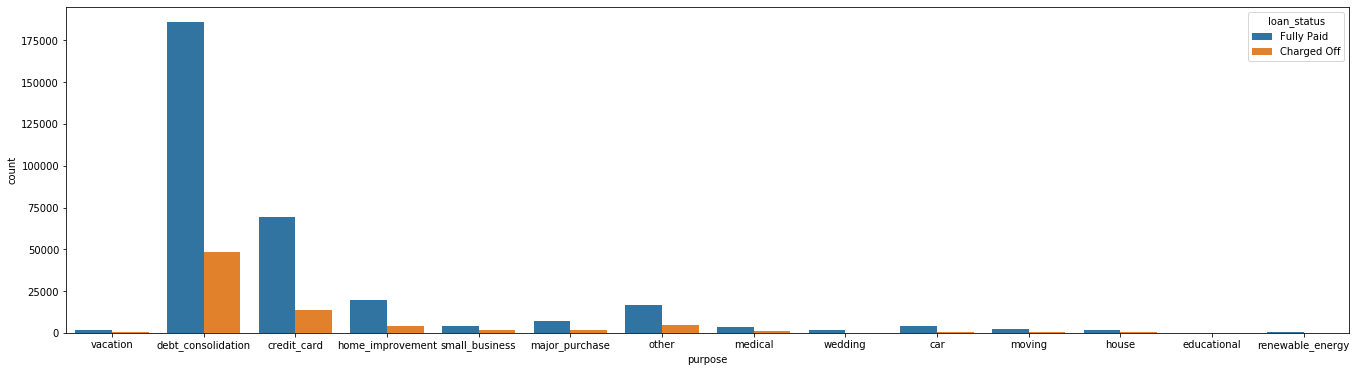

In [84]:
plt.figure(figsize=(23,6))
sns.countplot(x="purpose",hue="loan_status",data=df_loan)

In [85]:
# exploring title column, it has too many unique values and its provided by borrower so should be removed

df_loan["title"].nunique()


48817

In [87]:
#exploring earliest credit line feature

df_loan["earliest_cr_line"].value_counts()


Oct-2000    3017
Aug-2000    2935
Oct-2001    2896
Aug-2001    2884
Nov-2000    2736
            ... 
Aug-1962       1
May-1955       1
Aug-1964       1
Apr-1958       1
Oct-1961       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [214]:
#converting earliest_cr_line to earliest_cr_line_year below and dropping earliest_cr_line

df_loan['earliest_cr_year'] = df_loan['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df_loan = df_loan.drop('earliest_cr_line',axis=1)

In [95]:
#exploring intial list status and application type, both are categorical variables and need one hot encoding
print(df_loan["initial_list_status"].value_counts())
print(df_loan["application_type"].value_counts())

f    238066
w    157964
Name: initial_list_status, dtype: int64
INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64


In [5]:
# exploring address, no null values and ends with zip code

df_loan["address"].isnull().sum()

0

In [215]:
#extrating zip codes from address and overrighting address column as we need rest of the address

df_loan["address"]= df_loan["address"].apply(lambda x: int(x[-5:]))


In [109]:
#looks like very few zip codes are there so can be one hot encoded
df_loan["address"].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
813      45824
29597    45471
5113     45402
11650    11226
93700    11151
86630    10981
Name: address, dtype: int64

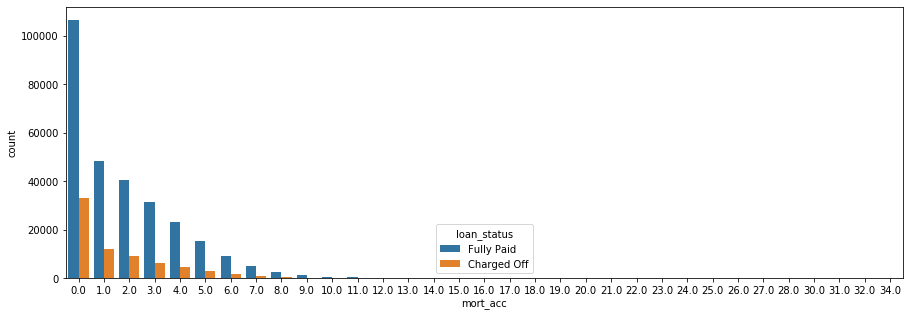

In [123]:
#exploring mort_acc feature, it has null values too

plt.figure(figsize=(15,5))
sns.countplot(x="mort_acc",hue="loan_status",data=df_loan)


In [124]:
# fetching unique values of mort_acc
df_loan["mort_acc"].nunique()

33

In [125]:
#exploring pub_rec_bankruptcies as it has null values

df_loan["pub_rec_bankruptcies"].value_counts()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

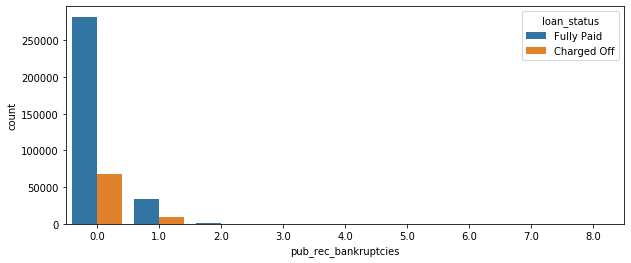

In [127]:
#only 0 and 1 value has impact so we can either delete others or combine 4.0 through 8.0 to 3.0
plt.figure(figsize=(10,4))
sns.countplot(x="pub_rec_bankruptcies",hue="loan_status",data=df_loan)

In [216]:
# since emp_title, title is provided by borrower so deleting that,, issue_d is the loan issue date by lending club to 
# borrower but here we are predicting whether loan will be paid or not, inlcusion of issue_date can be cheating
# so deleteing this column as well


df_loan=df_loan.drop(labels=["issue_d","emp_title","title"],axis=1)



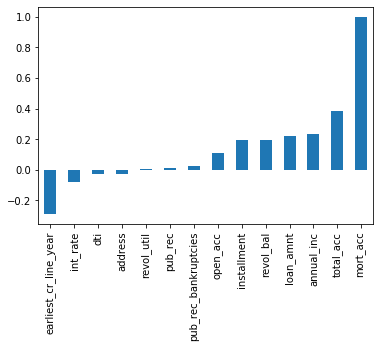

In [40]:
# checking mort_acc correlation and seems like total_acc has strongest correlation with mort_acc
# we can either fill missing NA in mort_acc with total_acc or with its own mean value

df_loan.corr()["mort_acc"].sort_values().plot(kind="bar")

In [217]:
#replacing missing values in mort_acc with its mean values
df_loan["mort_acc"].fillna(value =df_loan["mort_acc"].mean(),inplace=True)

In [218]:
# dropping missing values of other columns as they are very less and wont impact much

df_loan.dropna(axis=1,inplace=True)

In [59]:
#checking with null values

df_loan.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
home_ownership           0
annual_inc               0
verification_status      0
loan_status              0
purpose                  0
dti                      0
open_acc                 0
pub_rec                  0
revol_bal                0
total_acc                0
initial_list_status      0
application_type         0
mort_acc                 0
address                  0
earliest_cr_line_year    0
dtype: int64

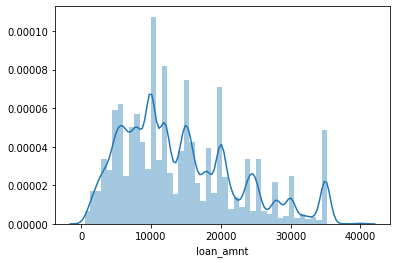

In [88]:
#checking some more distributions

sns.distplot(df_loan["loan_amnt"],hist=True)

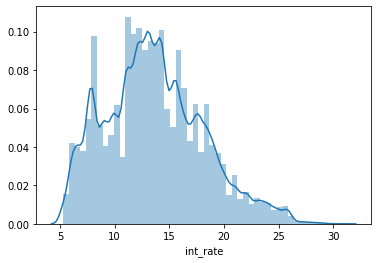

In [89]:
sns.distplot(df_loan["int_rate"],hist=True)

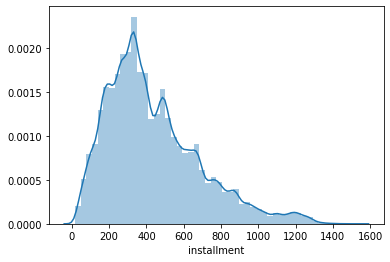

In [90]:
sns.distplot(df_loan["installment"],hist=True)

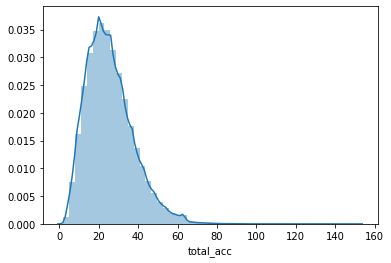

In [60]:

sns.distplot(df_loan["total_acc"])

In [86]:
df_loan.head(3)

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,total_acc,mort_acc,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,address_5113,address_11650,address_22690,address_29597,address_30723,address_48052,address_70466,address_86630,address_93700,earliest_cr_line_year
0,10000.0,11.44,329.48,117000.0,1,26.24,16.0,0.0,36369.0,25.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1990
1,8000.0,11.99,265.68,65000.0,1,22.05,17.0,0.0,20131.0,27.0,3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,10.49,506.97,43057.0,1,12.79,13.0,0.0,11987.0,26.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,2007


In [219]:
# convert categorical variables to dummy variables/one hot encoding to convert them to numerical columns

df_loan= pd.get_dummies(data=df_loan,columns=["term","grade","sub_grade",
                                     "home_ownership","verification_status","purpose",
                                     "initial_list_status","application_type","address"],drop_first=True)

In [161]:
#checking shape , columns are 85 now 

df_loan.shape

(396030, 85)

In [220]:
# split label(loan_status) to numerical values 

df_loan["loan_status"].replace(to_replace=["Fully Paid","Charged Off"], value = [1,0],inplace=True)


In [163]:
df_loan["loan_status"].value_counts()

1    318357
0     77673
Name: loan_status, dtype: int64

In [117]:
df_loan.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'mort_acc',
       'earliest_cr_year', 'term_ 60 months', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT

In [221]:
# Split into feature and labels

X= df_loan.drop("loan_status",axis=1).values
y= df_loan["loan_status"].values

In [222]:
X.shape

(396030, 84)

In [223]:
y.shape

(396030,)

In [224]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [225]:
#use minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[0.13924051, 0.40085703, 0.1276314 , ..., 0.        , 0.        ,
        0.        ],
       [0.26582278, 0.28710557, 0.23253148, ..., 1.        , 0.        ,
        0.        ],
       [0.30379747, 0.55317491, 0.20541862, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.49367089, 0.22088041, 0.42075995, ..., 0.        , 0.        ,
        0.        ],
       [0.31139241, 0.10050643, 0.25329934, ..., 0.        , 0.        ,
        0.        ],
       [0.2278481 , 0.26490066, 0.1976702 , ..., 0.        , 0.        ,
        0.        ]])

In [226]:
# scale test features too, do not fit them to avoid data leakage, directly transform

scaler.transform(X_test)

array([[0.12658228, 0.64939618, 0.12778294, ..., 0.        , 0.        ,
        0.        ],
       [0.24050633, 0.62991819, 0.23930475, ..., 0.        , 0.        ,
        0.        ],
       [0.39240506, 0.13946241, 0.32415515, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26835443, 0.46552396, 0.25113821, ..., 0.        , 0.        ,
        0.        ],
       [0.10126582, 0.34437086, 0.09097138, ..., 0.        , 0.        ,
        0.        ],
       [0.34177215, 0.31632256, 0.2013731 , ..., 0.        , 0.        ,
        0.        ]])

In [227]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [228]:
#define the model using Keras


from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
model1.add(Dense(84,activation="relu"))
model1.add(Dense(64,activation="relu"))
model1.add(Dense(32,activation="relu"))

#define output layer
model1.add(Dense(1,activation="sigmoid"))

In [229]:
#compile the model

model1.compile(loss="binary_crossentropy",optimizer="adam")

In [230]:
#fit the model

history1 = model1.fit(X_train,y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1238/1238 [==============================] - 2s 2ms/step - loss: 28.9145 - val_loss: 22.1060
Epoch 2/25
1238/1238 [==============================] - 2s 1ms/step - loss: 12.5367 - val_loss: 12.3926
Epoch 3/25
1238/1238 [==============================] - 2s 1ms/step - loss: 8.9091 - val_loss: 11.6380
Epoch 4/25
1238/1238 [==============================] - 2s 1ms/step - loss: 5.9755 - val_loss: 11.1275
Epoch 5/25
1238/1238 [==============================] - 2s 1ms/step - loss: 4.0347 - val_loss: 5.6907
Epoch 6/25
1238/1238 [==============================] - 2s 1ms/step - loss: 2.5996 - val_loss: 1.6474
Epoch 7/25
1238/1238 [==============================] - 2s 1ms/step - loss: 1.6600 - val_loss: 0.7538
Epoch 8/25
1238/1238 [==============================] - 2s 1ms/step - loss: 0.9928 - val_loss: 0.5872
Epoch 9/25
1238/1238 [==============================] - 2s 1ms/step - loss: 0.6950 - val_loss: 3.1854
Epoch 10/25
1238/1238 [==============================] - 2s 1ms/step - loss:

In [231]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_squared_error(y_test,model1.predict(X_test))

0.15739119538962712

In [232]:
loss  = pd.DataFrame(history1.history)

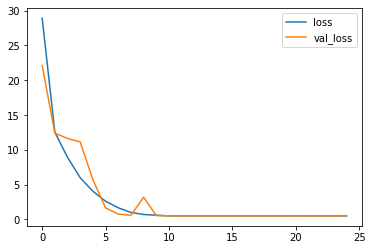

In [233]:
loss.plot()

In [234]:
y_pred = model.predict_classes(X_test)

In [236]:
from sklearn.metrics import confusion_matrix,classification_report

print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[    0     0]
 [15493 63713]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89     79206

    accuracy                           0.80     79206
   macro avg       0.50      0.40      0.45     79206
weighted avg       1.00      0.80      0.89     79206

